In [97]:
import os
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams.update({'font.size': 22})

from matplotlib import rc
import matplotlib.pylab as plt

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
plt.rcParams['figure.dpi'] = 300

import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('tableau-colorblind10')

# Retrieve color cycle from ggplot style
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
os.getcwd()

'/Users/timw/Documents/University/thesis_2/scripts/Exp2.7'

In [98]:
root_dir = "/Users/timw/Documents/University/thesis_2/results/Exp2.7.1/"

# Get directories
dirs = [dirnames for dipath, dirnames, filenames in os.walk(root_dir)][0]

# Pick directories that are from the relevant experiment
dirs = [dir for dir in dirs if "Exp2.7.1" in dir]

dirs

['ftMS_smard_load_sl24_ll24_pl24_Autoformer_opadam_lstype1_wd0.0_do0.0_ep5_dm64_lr0.0005_bs32_nh4_el3.0_dl3_df64_fc3_ebtimeF_dtTrue_Exp2.7.1',
 'ftMS_smard_load_sl24_ll0_pl24_Transformer_opadam_lstype1_wd0.0_do0.0_ep5_dm64_lr0.0005_bs32_nh4_el3.0_dl3_df64_fc3_ebtimeF_dtTrue_Exp2.7.1',
 'ftMS_smard_load_sl24_ll0_pl24_TSMixer_opadam_lstype1_wd0.0_do0.0_ep5_dm64_lr0.0005_bs32_nh4_el3.0_dl3_df64_fc3_ebtimeF_dtTrue_Exp2.7.1',
 'ftMS_smard_load_sl24_ll0_pl24_LSTM_opadam_lstype1_wd0.0_do0.0_ep5_dm64_lr0.0005_bs32_nh4_el3.0_dl3_df64_fc3_ebtimeF_dtTrue_Exp2.7.1',
 'ftMS_smard_load_sl24_ll0_pl24_DLinear_opadam_lstype1_wd0.0_do0.0_ep5_dm64_lr0.0005_bs32_nh4_el3.0_dl3_df64_fc3_ebtimeF_dtTrue_Exp2.7.1',
 'ftMS_smard_load_sl24_ll0_pl24_Informer_opadam_lstype1_wd0.0_do0.0_ep5_dm64_lr0.0005_bs32_nh4_el3.0_dl3_df64_fc3_ebtimeF_dtTrue_Exp2.7.1',
 'ftMS_smard_load_sl24_ll0_pl24_iTransformer_opadam_lstype1_wd0.0_do0.0_ep5_dm64_lr0.0005_bs32_nh4_el3.0_dl3_df64_fc3_ebtimeF_dtTrue_Exp2.7.1',
 'ftMS_smard_loa

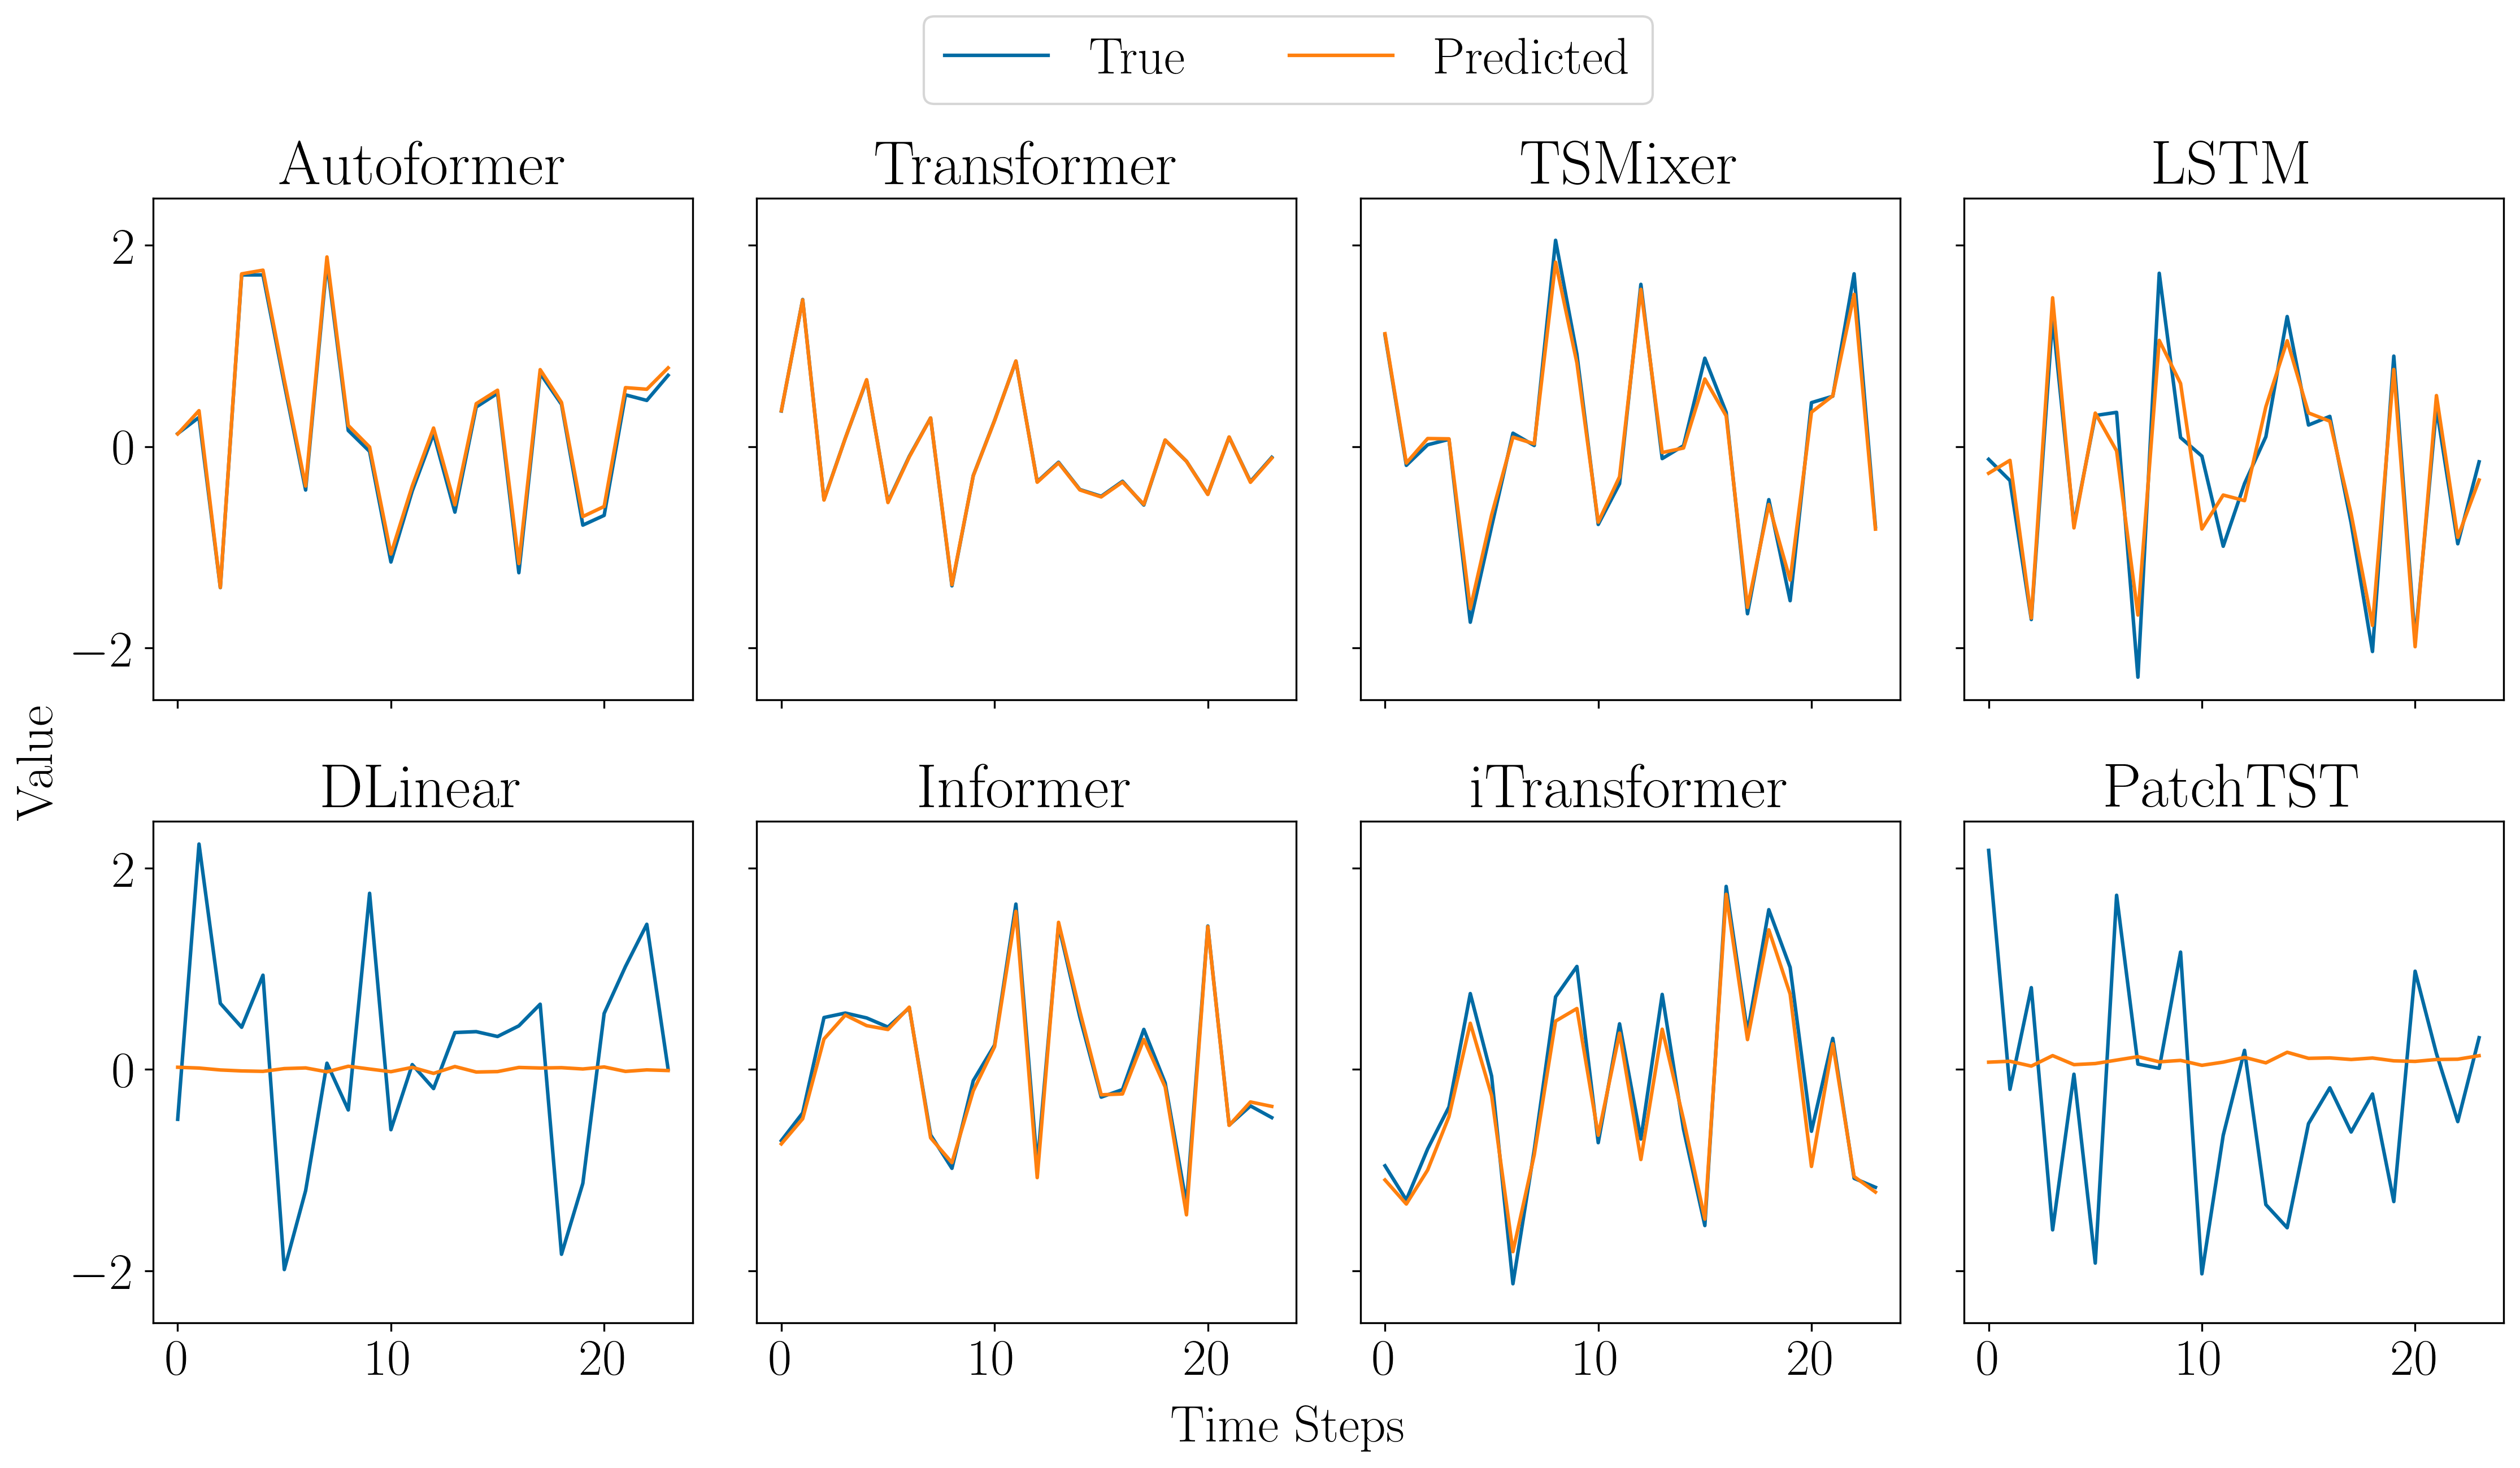

In [99]:
metrics = []
preds = []
truths = []
for dir in dirs:
    for i, subdir in enumerate([dirnames for dipath, dirnames, filenames in os.walk(root_dir + dir + "/")][0]):
        metric = np.load(root_dir + dir + "/" + subdir + "/_metrics.npy")
        pred = np.load(root_dir + dir + "/" + subdir + "/_pred.npy")
        truth = np.load(root_dir + dir + "/" + subdir + "/_true.npy")
        metrics.append(metric)
        preds.append(pred)
        truths.append(truth)
        #print(subdir)
        #print(pred.shape)
        #print(truth.shape)

models = ["Autoformer", "Transformer", "TSMixer", "LSTM", "DLinear", "Informer", "iTransformer", "PatchTST"]
fig, ax = plt.subplots(2,4, sharey=True, sharex=True, figsize=(15,8))
for n, (pred, truth) in enumerate(zip(preds, truths)):
    j = 1 if n > 3 else 0
    i = n % 4
    ax[j][i].plot(truth[100,:,0])
    ax[j][i].plot(pred[100,:,0])
    ax[j][i].set_title(models[n])

# x axis label
fig.text(0.5, 0, 'Time Steps', ha='center')

# y axis label
fig.text(0, 0.5, 'Amplitude', va='center', rotation='vertical')

# Legend on top with explicit positioning
fig.legend(["True", "Predicted"], loc='upper center', bbox_to_anchor=(0.5, 1.07), ncol=2)


plt.tight_layout()
plt.show()




        
